In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from pandas.io.data import DataReader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [13]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,114.192885,115.280514,112.971739,114.132490,4.860729e+07,113.149883
std,10.916799,10.767694,10.987784,10.833646,2.098204e+07,10.237195
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.269997,108.000000,105.650002,106.820000,3.424460e+07,106.651287
50%,113.849998,115.389999,112.519997,113.919998,4.463320e+07,113.023697
75%,124.769997,125.739998,123.360001,124.529999,5.555040e+07,122.744682
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-04-20 to 2016-04-19
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


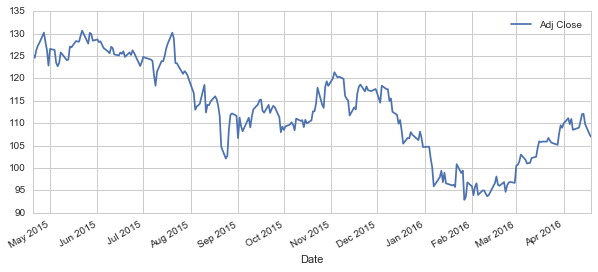

In [15]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

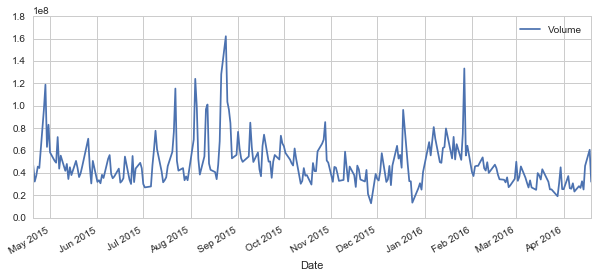

In [17]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

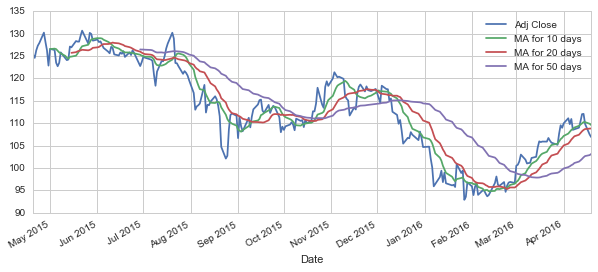

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

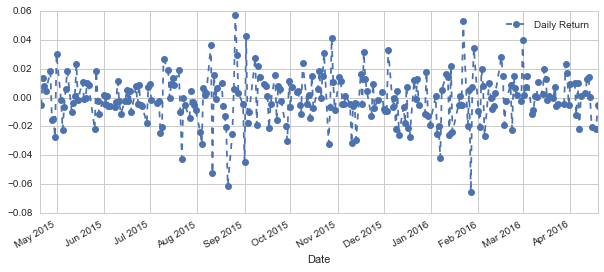

In [22]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

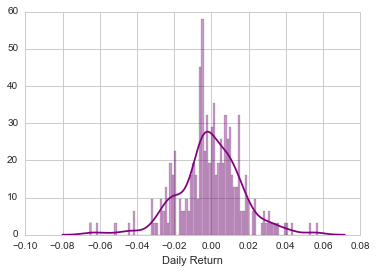

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

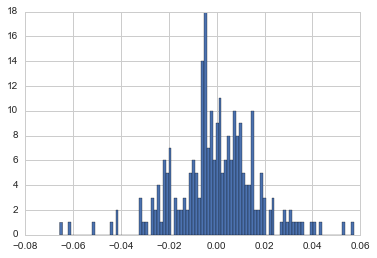

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [27]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [28]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-20,125.277689,389.510010,535.382408,41.770164
2015-04-21,124.600252,391.179993,533.972413,41.507336
2015-04-22,126.279121,389.799988,539.367458,41.848041
2015-04-23,127.310014,389.989990,547.002472,42.188742
2015-04-24,127.908913,445.100006,565.062561,46.598409


In [29]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.005407,0.004287,-0.002634,-0.006292
2015-04-22,0.013474,-0.003528,0.010104,0.008208
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522


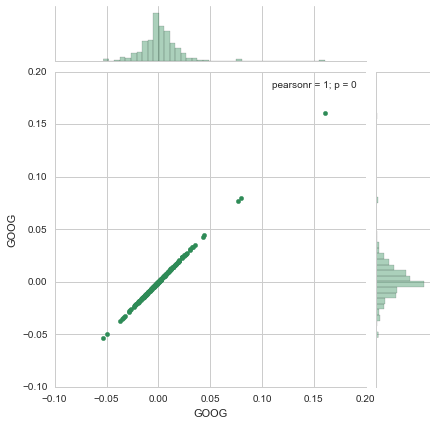

In [33]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

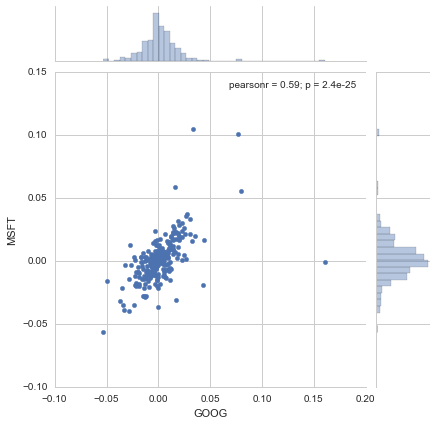

In [34]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [35]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.005407,0.004287,-0.002634,-0.006292
2015-04-22,0.013474,-0.003528,0.010104,0.008208
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522


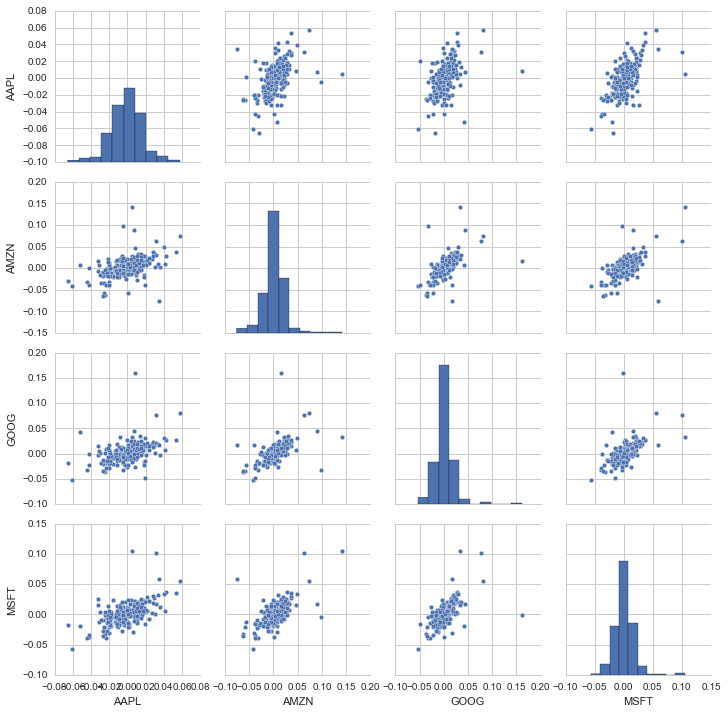

In [41]:
sns.pairplot(tech_rets.dropna())

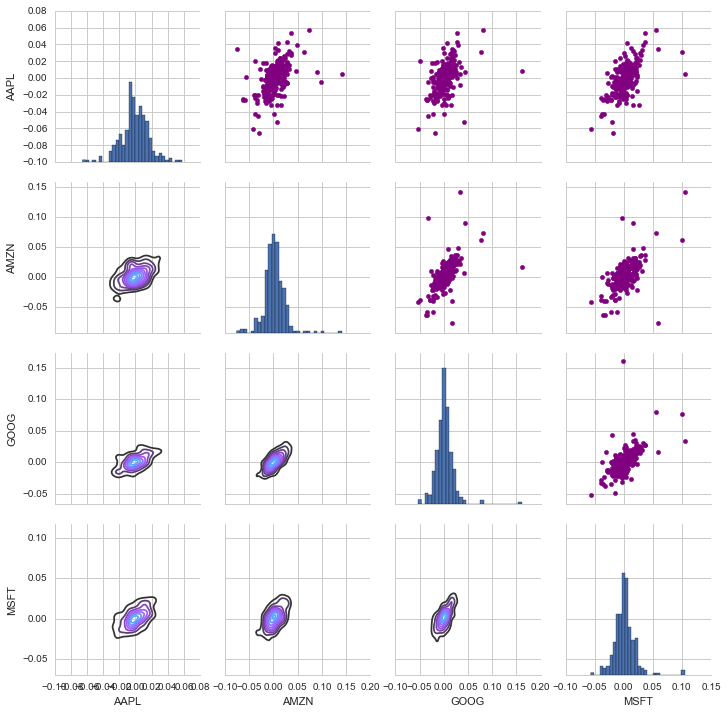

In [39]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

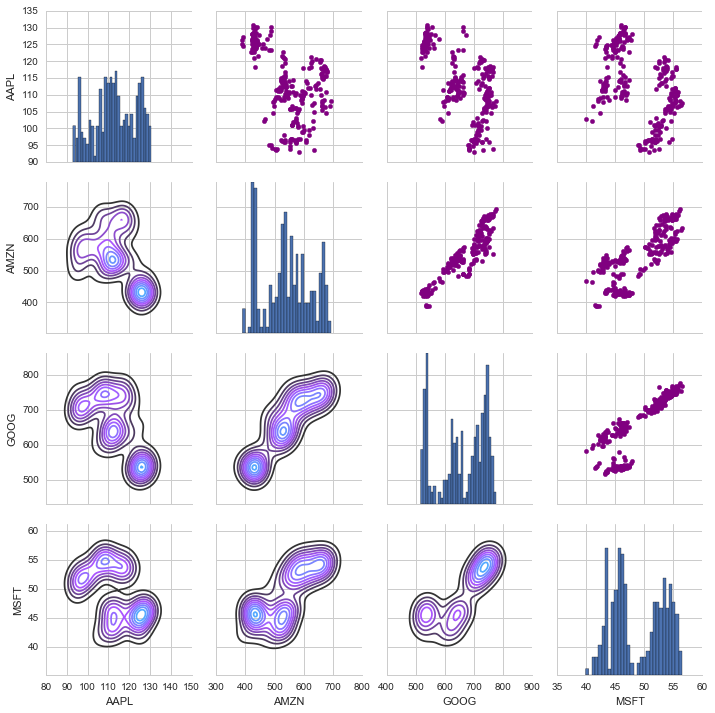

In [42]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

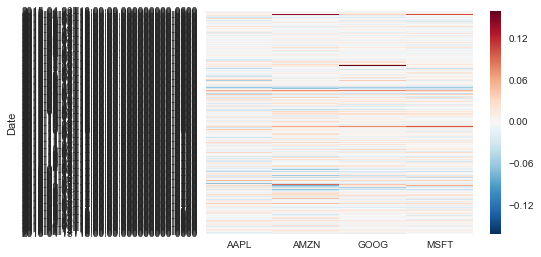

In [45]:
sns.heatmap(tech_rets.dropna())

C:\Users\Chase Stoeger\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Chase Stoeger\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


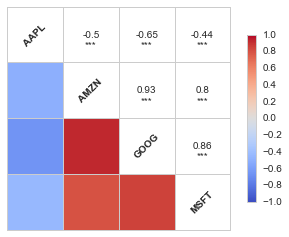

In [46]:
sns.corrplot(closing_df,annot=True)

In [47]:
rets = tech_rets.dropna()

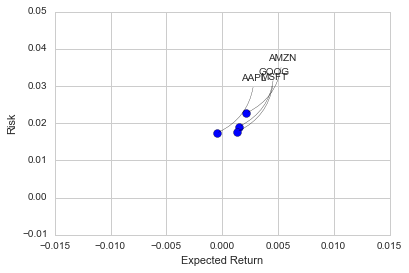

In [52]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')

plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## Value at Risk

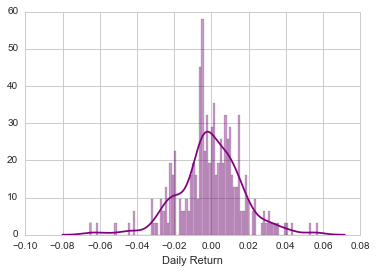

In [53]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-21,-0.005407,0.004287,-0.002634,-0.006292
2015-04-22,0.013474,-0.003528,0.010104,0.008208
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522
2015-04-27,0.018192,-0.014693,-0.017153,0.003342


In [55]:
rets['AAPL'].quantile(0.05)

-0.026870597580305255

In [56]:
# Value at risk for the day is 2.69% of your total investment for Apple stock
